# Assignment 16

1. Collect 100 images of faces from online sources (you can use any existing database as well, but we need multiple faces)
2. Please make sure that there are not too many faces in the image
3. Classes are:  Front, Left, Right, Up, Down, UpLeft, UpRight, DownLeft, DownRight, Top, Back. Please make sure you have these kind of faces in your collection. Also please make sure that your LEFT is the LEFT of your screen. 
4. resize your images to 400x400
5. Rename your images as img_001 to img_100. 
6. Annotate these objects using VGG Annotator (Links to an external site.) (using a local copy)
7. Use K-means clustering to find out the top 4 anchor boxes
8. Upload to github
  * images in a zipped folder
  * your annotation file (json)
  * k-means code
9. Add a readme file and show:
  * few screenshots of your annotations
  * your 4 bounding box dimensions

Note: You will be using these images for your Face Recognition Session, so make sure your annotations are good.

### Getting the height and width of all the images to store in list.

In [0]:
zip_file_url = 'https://doc-0k-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g0kk0enai597lflqpquj83idrqt222nr/1574359200000/06632186555192968294/*/1e38waNUBwwqkiTuRuurysEUank5j-W8S?e=download'

import requests, zipfile, io, os

r = requests.get(zip_file_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()
########################################################################
from PIL import Image

image_widths = []
image_heights = []
for r, d, f in os.walk('/content/finalImages/'):
    for file in sorted(f):
      # print(file)
      im = Image.open('/content/finalImages/'+ file)
      width, height = im.size
      image_widths.append(width)
      image_heights.append(height)
########################################################################

### Getting the height and width of bounding boxes from the JSON File abd store in list.

In [0]:
import json
with open('/content/faceImage100.json') as f:
  data = json.load(f)

bb_widths = []
bb_heights = []

for index, eachImage in enumerate(data["_via_img_metadata"].values()): 
  for eachRegion in eachImage['regions']:
    shape_attributes = eachRegion["shape_attributes"]
    bb_widths.append(shape_attributes['width']/image_widths[index])
    bb_heights.append(shape_attributes['height']/image_heights[index])


### Plotting graph for BB Heights VS BB Widths

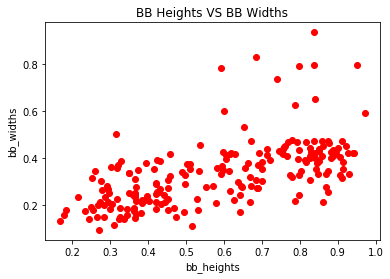

In [53]:
################################
import math
import matplotlib.pyplot as plt

plt.plot(bb_heights, bb_widths, 'ro') 
  
# naming the x axis 
plt.xlabel('bb_heights') 
# naming the y axis 
plt.ylabel('bb_widths') 
  
# giving a title to my graph 
plt.title('BB Heights VS BB Widths') 
  
# function to show the plot 
plt.show() 
################################

### Plotting graph for BB Log Heights VS BB Log Widths

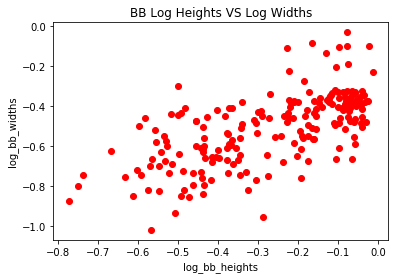

In [44]:
################################

log_bb_heights = list(map(lambda x: math.log10(x), bb_heights))
log_bb_widths = list(map(lambda x: math.log10(x), bb_widths))

plt.plot(log_bb_heights, log_bb_widths, 'ro') 
  
# naming the x axis 
plt.xlabel('log_bb_heights') 
# naming the y axis 
plt.ylabel('log_bb_widths') 
  
# giving a title to my graph 
plt.title('BB Log Heights VS Log Widths') 
  
# function to show the plot 
plt.show() 
# ##################################

### Using KMEAS algorithm to find the 4 bouding box dimensions.

In [51]:
# KMEANS K = 4

from sklearn.cluster import KMeans
import numpy as np

list_for_kmeans = []
for index, each in enumerate(bb_widths):
  list_for_kmeans.append([bb_heights[index], bb_widths[index]])

kmeans = KMeans(n_clusters=4, random_state=0).fit(list_for_kmeans)
print("4 clusters [height, width] = \n", kmeans.cluster_centers_)

4 clusters [height, width] = 
 [[0.84026957 0.39908429]
 [0.60873609 0.3349399 ]
 [0.76679704 0.75434331]
 [0.35124573 0.23816278]]


## Afer K-Means, 4 bounding box dimesions we get are:
1. 0.84026957 0.39908429
2. 0.60873609 0.3349399 
3. 0.76679704 0.75434331
4. 0.35124573 0.23816278